# Quadrotor Direct Transcription
by Sebastian Lopez-Cot

This python notebook can be used to run the quad-ball system. The quadrotor will try to send a ball to a desired location given initial conditions and will attempt to return to its original starting point.

Should end at:  [-3.9  3.7]
Number of decision vars:  160
Solve:  SolutionResult.kSolutionFound


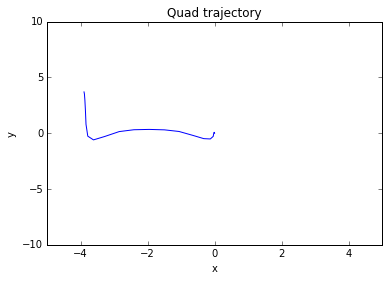

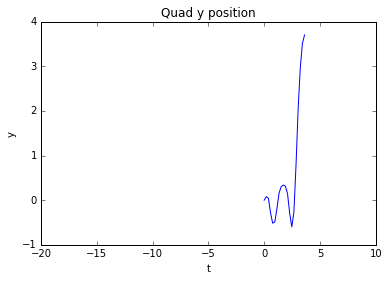

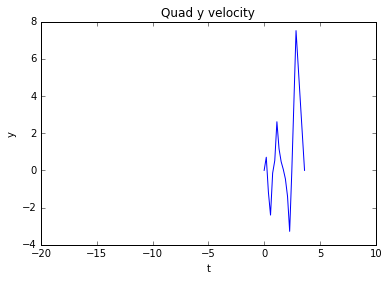

[[ 1.35779112  1.08142385]
 [ 0.          0.39316918]
 [ 0.34154396 -0.26063352]
 [ 2.19625483 -0.68776035]
 [ 1.36756345 -0.82135968]
 [ 2.12527648 -0.72599954]
 [ 0.22718432 -0.4926017 ]
 [ 0.62493789 -0.22927792]
 [ 0.76004331  0.06670537]
 [ 0.70603276  0.37817533]
 [ 0.49618771  0.68678021]
 [ 0.          0.99014146]
 [ 2.70576383  1.18860236]
 [ 3.          1.12494962]
 [ 3.          0.7060234 ]
 [ 0.          0.08903054]
 [ 0.         -0.52796316]
 [ 0.         -1.14495764]
 [ 0.         -1.76194781]
 [ 0.          0.        ]]


In [20]:
%reload_ext autoreload
%autoreload 2

import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import scipy as sp

from pydrake.all import MathematicalProgram
from pydrake.symbolic import (sin,cos,tanh)

from quad_ball_system import (QuadDirectTranscription, Quadrotor)
from IPython.display import HTML

# Define the min and max time for the problem
time_used = 4.0

# Quad initial conditions
initial_quad_state = np.zeros(6)
initial_quad_state[0] = 0.0
initial_quad_state[1] = 0.0
initial_quad_state[2] = 0.0
initial_quad_state[3] = 0.0
initial_quad_state[4] = 0.0
initial_quad_state[5] = 0.0

final_quad_state = np.zeros(6)
final_quad_state[0] = np.random.choice(np.arange(-4.0, 4.0, 0.1))
final_quad_state[1] = np.random.choice(np.arange(1.0, 5.0, 0.1))
final_quad_state[2] = np.random.choice(np.arange(-np.pi/6.0, np.pi/6.0, 0.1))
final_quad_state[3] = 0.0
final_quad_state[4] = 0.0
final_quad_state[5] = 0.0

print "Should end at: ", final_quad_state[0:2]

# System params
quad_mass = 0.1
ball_mass = 0.01
g = -9.81
beta = 1.0

# Run the solver
qdt = QuadDirectTranscription(quad_mass, g)
quad_traj, input_traj, time_array = qdt.solve(initial_quad_state, final_quad_state, time_used)

# Visualize the results
plt.figure()
plt.title("Quad trajectory")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-5,5)
plt.ylim(-10,10)
plt.plot(quad_traj[:,0], quad_traj[:,1])
plt.show()

plt.figure()
plt.title("Quad y position")
plt.xlim(-20,10)
plt.xlabel("t")
plt.ylabel("y")
plt.plot(time_array[0:20], quad_traj[:,1])
plt.show()

plt.figure()
plt.title("Quad y velocity")
plt.xlim(-20,10)
plt.xlabel("t")
plt.ylabel("y")
plt.plot(time_array[0:20], quad_traj[:,4])
plt.show()

print input_traj
